# SAMPLING


Write code in Phython to simulate sampling distribution models using both the Central Limit Theorem and Bootstrapping approach. Generate random sample(s) from a normally distributed population with chosen mean and standard deviation. Use a relatively large sample size (>= 50). Create a histogram of the sampling distribution for both methods. For the boostrapping method, compare the mean of the resamples and the mean of the original sample to the actual population mean. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. The Central Limit Theorem

**I create a random sample**

6.8637383812297488

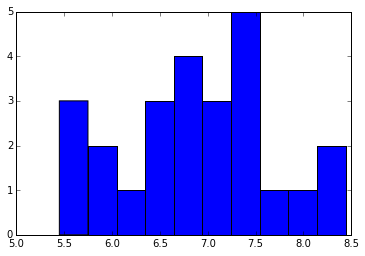

In [2]:
s = np.random.normal(7, 0.9, 25)
plt.hist(s)
np.mean(s)

**If I create another random sample with the same mean and SD it looks different:**

7.0264549713178868

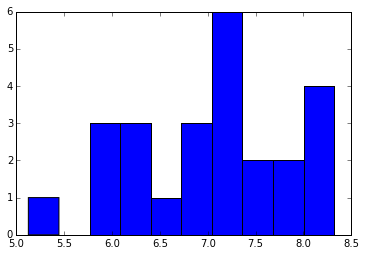

In [3]:
s = np.random.normal(7, 0.9, 25)
plt.hist(s)
np.mean(s)

** One more time:**

7.3773885567445951

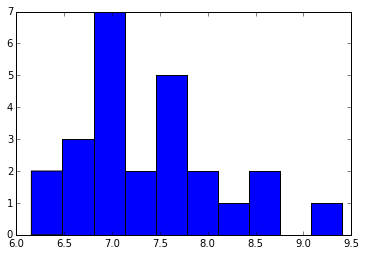

In [4]:
s = np.random.normal(7, 0.9, 25)
plt.hist(s)
np.mean(s)

** So, let's make a resample:**

In [5]:
forhist = []
for i in range(1000):
    s = np.random.normal(7, 0.9, 25)
    #plt.hist(s)
    forhist.append( np.mean(s) )
forhist

[7.2241209029358719,
 6.9421447603472277,
 7.2099453183349791,
 7.0175707586713463,
 6.8677795038774461,
 6.990857492528793,
 7.0149858727183991,
 6.65050373253142,
 6.9641651290064877,
 7.0248538845872188,
 6.4140962045191419,
 6.9844346826928225,
 6.9526207652887662,
 6.8714300793335381,
 7.0944885719653428,
 6.8948765056781971,
 7.0307505999761863,
 6.9758147447530074,
 7.0388979147496977,
 6.8593655837173051,
 6.9432823760185132,
 7.1098851518719766,
 6.8223084081126721,
 7.1411247900274031,
 7.2044847117398616,
 6.7404190028128337,
 7.1445593671648497,
 6.8026823982428457,
 7.0782618931866441,
 7.2135052592414333,
 7.3789349599845124,
 7.1383559525837654,
 6.7896364318321396,
 6.8833423195475953,
 6.8606132390437677,
 7.1401916960494587,
 7.2122343241033402,
 6.936291733393011,
 7.0679334521265034,
 6.7736970866451305,
 7.0736024670042097,
 6.9978876162854604,
 6.9531085526748511,
 7.0309505691245375,
 7.1438998708696548,
 7.1276418820404901,
 6.8884569151222017,
 7.14775024340856

(array([   4.,   11.,   59.,  130.,  239.,  251.,  171.,   93.,   33.,    9.]),
 array([ 6.4140962 ,  6.52593387,  6.63777153,  6.74960919,  6.86144686,
         6.97328452,  7.08512218,  7.19695985,  7.30879751,  7.42063517,
         7.53247284]),
 <a list of 10 Patch objects>)

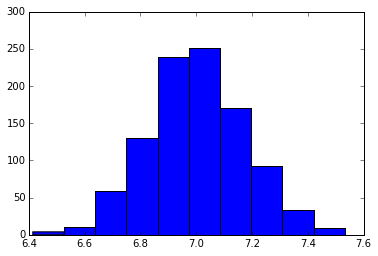

In [6]:
plt.hist(forhist)

In [15]:
print np.mean(forhist)
print np.std(forhist)

7.00143102451
0.174615956197


** That looks like a really bell shaped normal distribution! According to the central limit theorem we get a normal distribuation if we resample many, many times.**

# 2. Bootstrapping

In [7]:
sample = np.random.normal(7, 0.9, 25)
sample

array([ 7.43108089,  6.74983212,  7.54558784,  5.87835271,  6.92683541,
        6.54137399,  7.27196015,  7.60342352,  6.56060759,  7.02680227,
        5.36442879,  5.0827122 ,  7.16464241,  6.85667224,  5.19033396,
        8.03883145,  7.19126662,  7.56965451,  6.80167433,  7.89460087,
        6.00101421,  7.68626829,  5.68705234,  6.71314996,  6.58400986])

(array([ 3.,  0.,  2.,  1.,  2.,  4.,  3.,  4.,  4.,  2.]),
 array([ 5.0827122 ,  5.37832412,  5.67393605,  5.96954797,  6.2651599 ,
         6.56077182,  6.85638375,  7.15199567,  7.4476076 ,  7.74321953,
         8.03883145]),
 <a list of 10 Patch objects>)

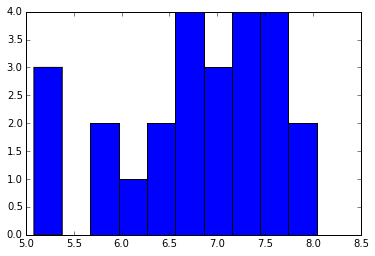

In [8]:
plt.hist(sample)

In [9]:
import scipy.stats as stat
def mean(X):
    return sum(X)/ float(len(X))
 
def bootstrap(sample, samplesize = None, nsamples = 100, statfunc = mean):
    """
    Arguments:
       sample - input sample of values
       nsamples - number of samples to generate
       samplesize - sample size of each generated sample
       statfunc- statistical function to apply to each generated sample.
 
    Performs resampling from sample with replacement, gathers
    statistic in a list computed by statfunc on the each generated sample.
    """
    if samplesize is None:                                                                   
        samplesize=len(sample)
    n = len(sample)
    X = []
    for i in range(nsamples):
        resample = [sample[j] for j in stat.randint.rvs(0, n-1, size=samplesize)] 
        x = statfunc(resample)
        X.append(x)
    return X

In [10]:
print "Sample length is", len(sample)
print "The samples look like", sample

Sample length is 25
The samples look like [ 7.43108089  6.74983212  7.54558784  5.87835271  6.92683541  6.54137399
  7.27196015  7.60342352  6.56060759  7.02680227  5.36442879  5.0827122
  7.16464241  6.85667224  5.19033396  8.03883145  7.19126662  7.56965451
  6.80167433  7.89460087  6.00101421  7.68626829  5.68705234  6.71314996
  6.58400986]


In [11]:
bootstrapped = bootstrap(sample, nsamples=1000)

In [16]:
print "The bootstrap has", len(bootstrapped), "elements"

The bootstrap has 1000 elements


(array([  14.,   48.,  120.,  185.,  245.,  210.,  131.,   36.,    8.,    3.]),
 array([ 6.29741414,  6.4043886 ,  6.51136307,  6.61833753,  6.72531199,
         6.83228645,  6.93926091,  7.04623537,  7.15320983,  7.2601843 ,
         7.36715876]),
 <a list of 10 Patch objects>)

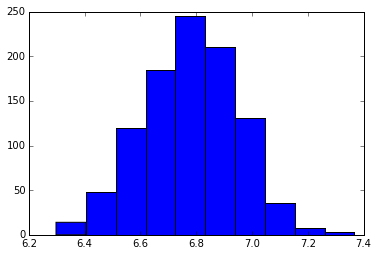

In [13]:
plt.hist(bootstrapped)

In [14]:
print np.mean(bootstrapped)
print np.std(bootstrapped)

6.77937674409
0.168465231165
